# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

### 数据整齐度

In [3]:
original_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
69,Adelie,Torgersen,41.8,19.4,198.0,4450.0,MALE
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,MALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,FEMALE
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,MALE
251,Gentoo,Biscoe,42.8,14.2,209.0,4700.0,FEMALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,MALE
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


很干净，无需拆分

In [4]:
cleaned_data = original_data.copy()

### 数据干净度

#### 数据类型异常

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
cleaned_data["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
cleaned_data["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

species-->category  
island-->category  
sex-->category

In [8]:
cleaned_data["species"]=cleaned_data["species"].astype("category")
cleaned_data["island"]=cleaned_data["island"].astype("category")
cleaned_data["sex"]=cleaned_data["sex"].astype("category")

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 数据缺失

culmen_length_mm缺失  
culmen_depth_mm缺失  
flipper_length_mm缺失  
body_mass_g缺失  
sex缺失

In [10]:
cleaned_data.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


无意义的数据，直接删

In [11]:
cleaned_data.dropna(subset=["culmen_length_mm"],inplace=True)

In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [13]:
cleaned_data.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


感觉可以保留

#### 数据重复

In [14]:
cleaned_data.drop_duplicates()
cleaned_data.duplicated().sum()

0

没问题的

#### 数据不一致

species  
island  
sex  


In [15]:
cleaned_data["species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [16]:
cleaned_data["island"].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [17]:
cleaned_data["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

???看看这个点怎么个事

In [18]:
cleaned_data.query("sex=='.'")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


从以上输出来看，`species`和`island`列里并不存在不一致数据，但`sex`列里存在一个英文句号值，并不代表任何有效性别，我们应当把该值替换为`NaN`空值。

In [19]:
cleaned_data["sex"].replace(".",np.nan,inplace=True)

In [20]:
cleaned_data['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

#### 数据错误

In [21]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


很正常

## 探索数据

In [22]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [23]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类比例

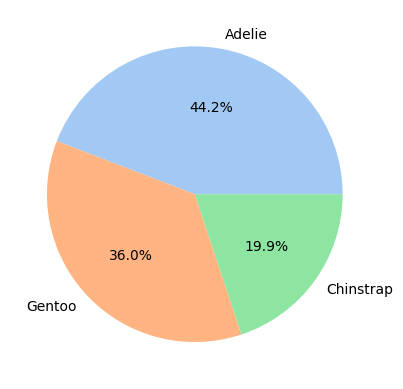

In [24]:
species_count=cleaned_data["species"].value_counts()
plt.pie(species_count,autopct="%.1f%%",labels=species_count.index)
plt.show()

### 企鹅所属岛屿比例

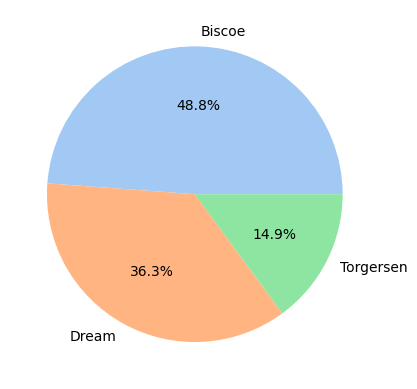

In [25]:
island_count=cleaned_data["island"].value_counts()
plt.pie(island_count,autopct="%.1f%%",labels=island_count.index)
plt.show()

### 企鹅性别比例

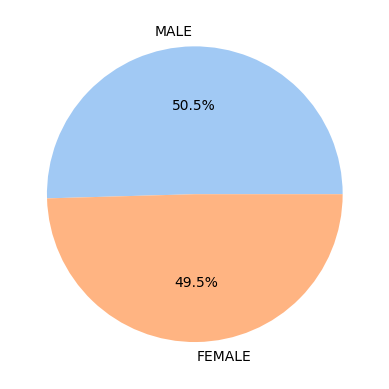

In [26]:
sex_count=cleaned_data["sex"].value_counts()
plt.pie(sex_count,autopct="%.1f%%",labels=sex_count.index)
plt.show()

### 不同岛上的企鹅种类数量

<AxesSubplot:xlabel='island', ylabel='count'>

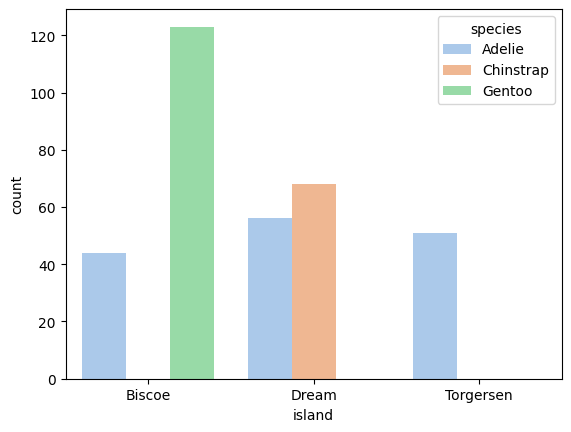

In [27]:
sns.countplot(cleaned_data,x="island",hue="species")

### 不同岛屿上的企鹅性别数量

<AxesSubplot:xlabel='island', ylabel='count'>

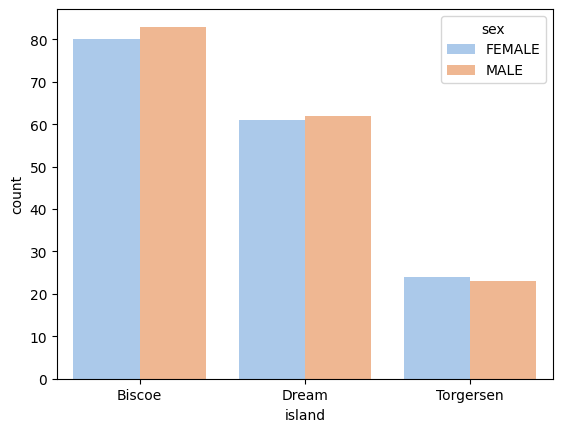

In [28]:
sns.countplot(cleaned_data,x="island",hue="sex")

### 查看数值之间的相关关系

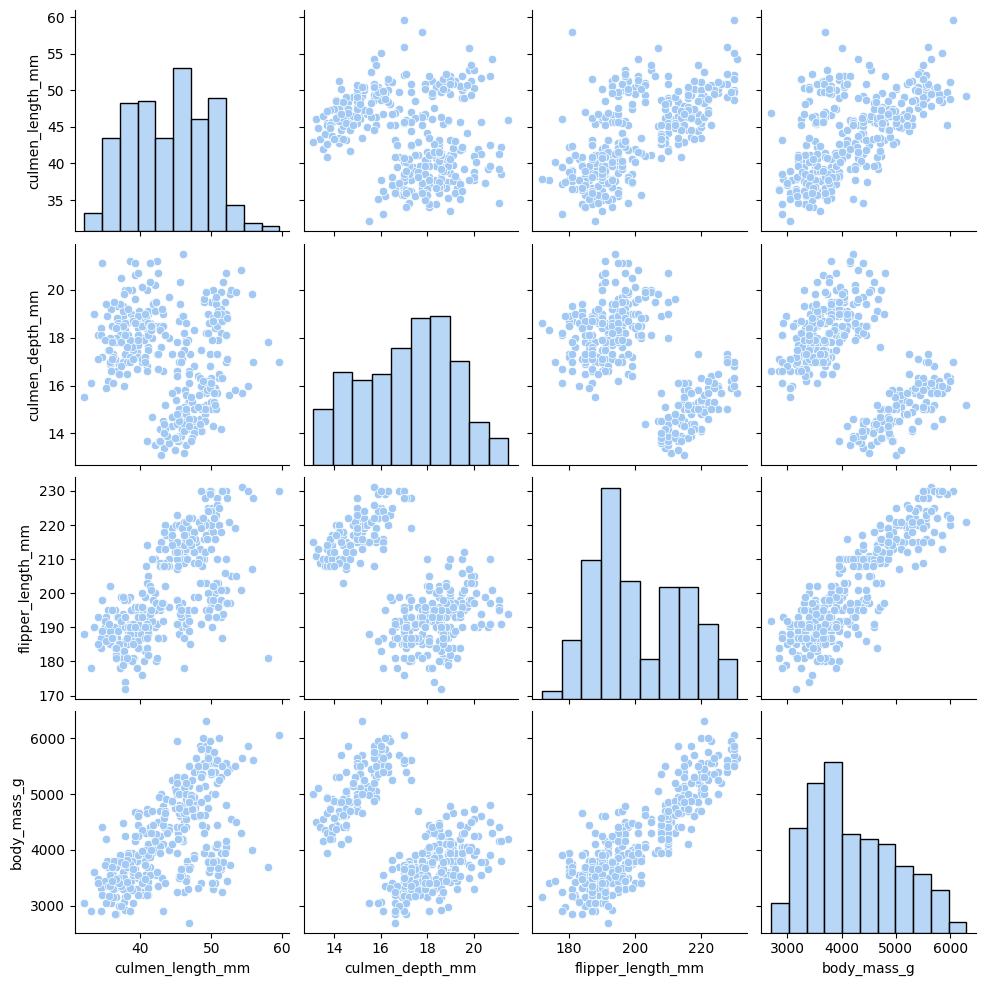

In [29]:
sns.pairplot(cleaned_data)
plt.show()

### 根据种类查看数值之间的相关关系

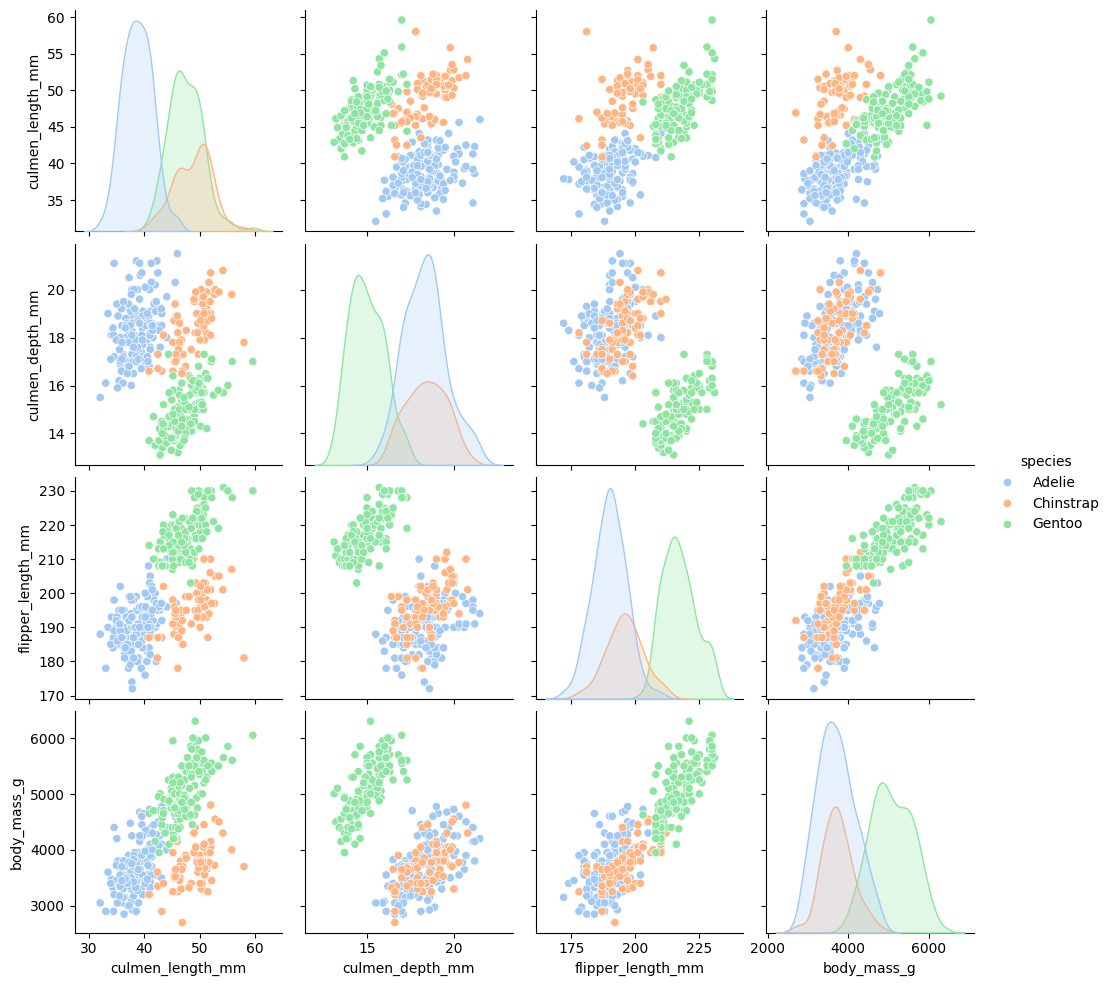

In [30]:
sns.pairplot(cleaned_data,hue="species")
plt.show()

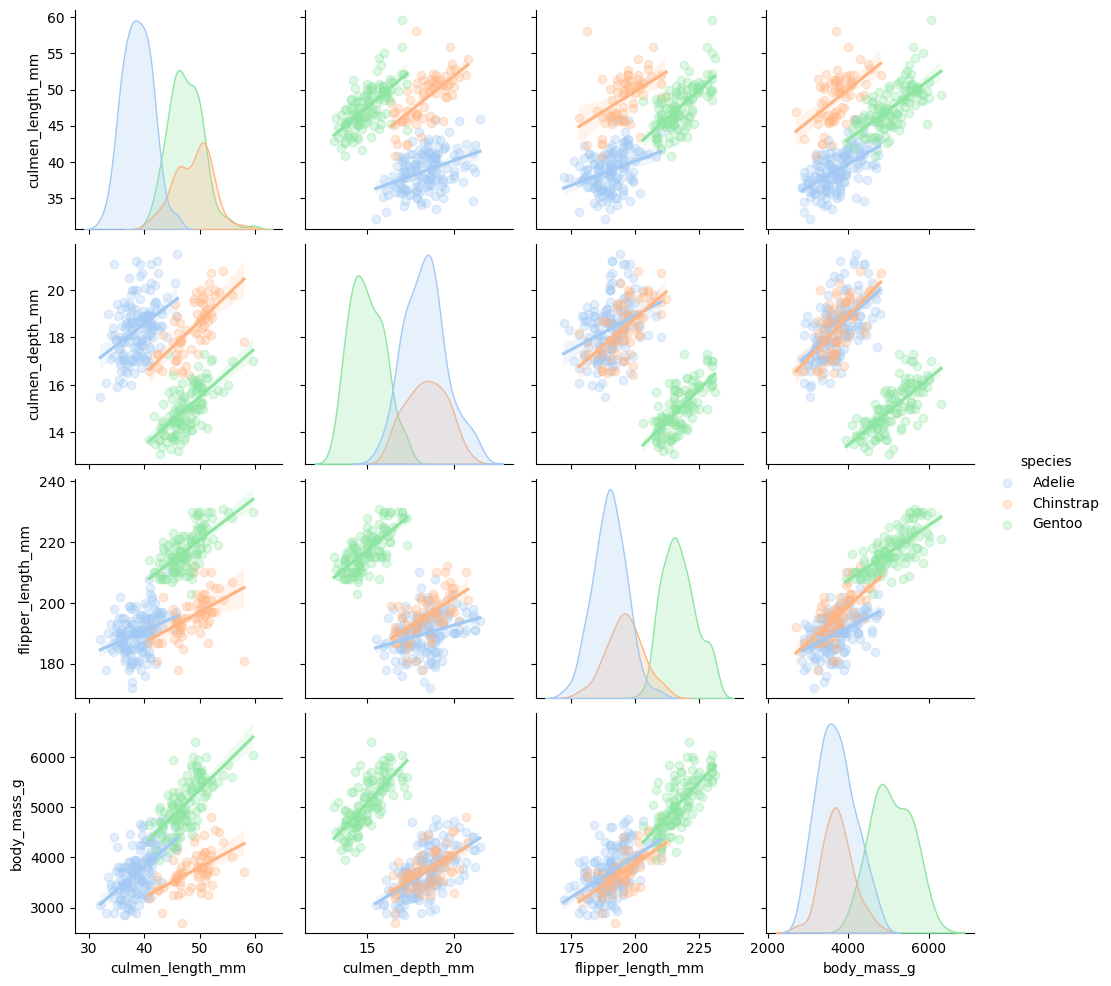

In [31]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

### 根据性别查看数值之间的相关关系

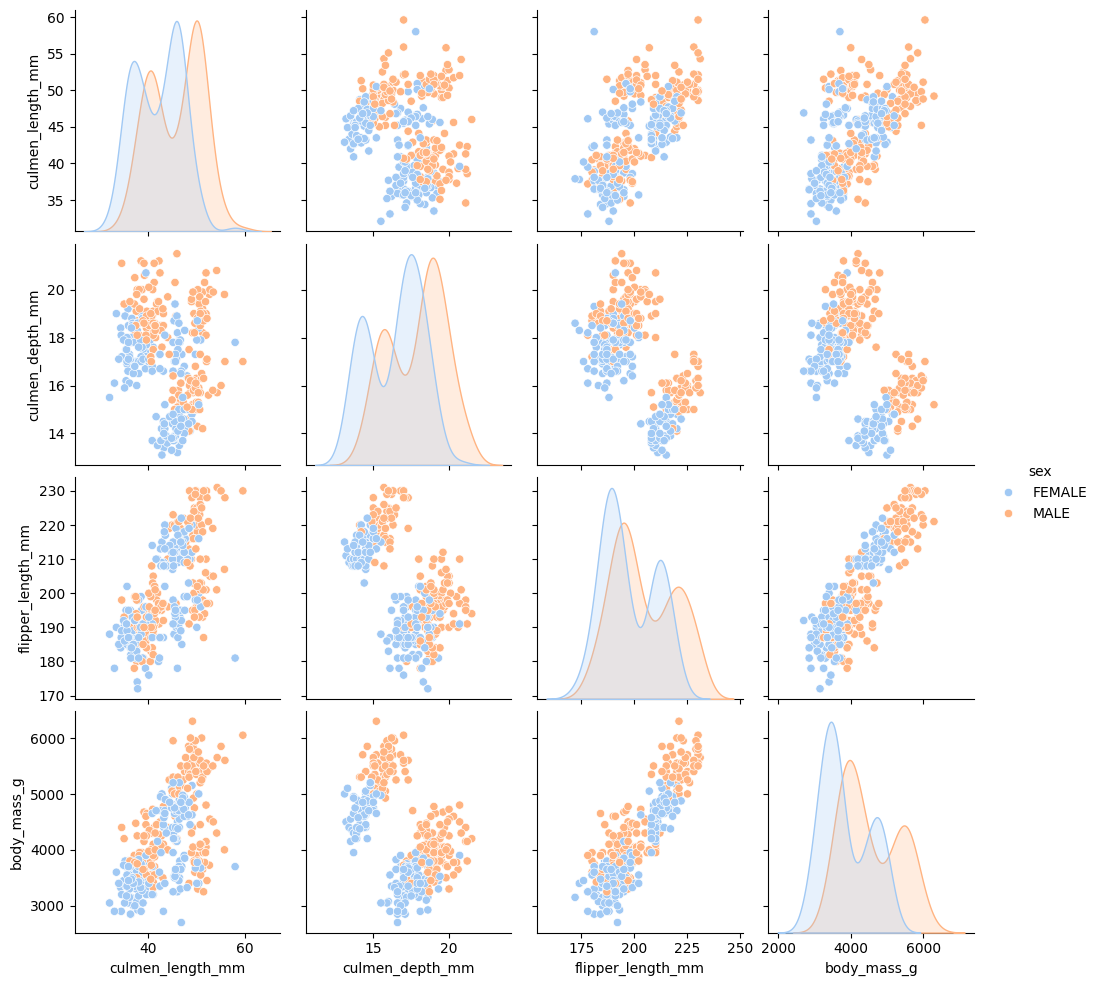

In [32]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()